# Notebook de preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Ressources

* https://github.com/lfsimoes/mars_express__esn (contient la liste des gits des meilleurs team)
* https://kelvins.esa.int/mars-express-power-challenge/data/ (à lire !!)

In [2]:
FOLDER = "/datasets/train_set/"
FEATURES = ['dmop', 'saaf', 'ftl', 'evtf', 'ltdata']
N_VAL = 500
YEAR = 2012

**Solar aspect angles (SAAF):**

* solar angles: sa, sx, sy, sz
* cosines of solar angles
* density, i.e. number of measurements in 1s intervals

**Events Files (EVTF):**

* indicators for occultation and penumbra/umbra events
* indicator for current nadir pointing direction (N-to-S or S-to-N)
* indicator for current Earth pointing direction (N-to-S or S-to-N)
* MEX's current/last position above Mars reference ellipsoid
* MEX's trajectory direction (ascend/descend) w.r.t. the Mars reference ellipsoid

**Flight Dynamics TimeLine (FTL):**

* indicators (one-hot encoding) of each event
* indicator of the communication device being used
 
**Detailed Mission Operations Plan (DMOP):**

* indicator (one-hot encoding) of each command for each subsystem (i.e. last triggered command)
* amount of command changes in the last hour for each subsystem

**Long-term data (LTDATA):**

* as is

In [ ]:
## Query regex unix
query_all = f"{FOLDER}*" # regex: tout ce qui commence par "FOLDER"

file_name_list = glob.glob(query_all) 
# execute un "ls" sur le query passé en argument, donc retourne tous 
# les fichiers contenus dans le dossier "FOLDER" isi
file_name_list

['data/train_set/context--2010-07-10_2012-05-27--saaf.csv',
 'data/train_set/context--2010-07-10_2012-05-27--dmop.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ltdata.csv',
 'data/train_set/context--2012-05-27_2014-04-14--dmop.csv',
 'data/train_set/power--2008-08-22_2010-07-10.csv',
 'data/train_set/power--2010-07-10_2012-05-27.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ltdata.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--evtf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--saaf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--saaf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--dmop.csv',
 'data/train_set/context--2010-07-10_2012-05-27--evtf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--evtf

In [3]:
def plot_all_columns_of_df(data, n_val):
    """
    Gather all columns of a dataframe, plot them stacked up to 
    the n_val value (if not the computer crashes because of RAM usage)
    """
    group = list(data.columns)
    fig, ax = plt.subplots(len(group), 1, figsize=(15,1.5 * len(group)))
    k = 0
    for col in group:
        ax[k].plot(data[col][:n_val])
        ax[k].set_title(col,y=0.5,loc="right")
        k+=1
    plt.show()

def selection(folder = FOLDER, search = "*", first = False):
    """
    Return a list of file in a folder following a search query. Return the name of the user selected file.
    If first, output the first result of the query
    """
    query_list = glob.glob(f"{folder}*{search}*")
    query_list_formated = [s.split(folder)[1] for s in query_list]
    query_list_formated_numbered  = [f'{i} - {query_list_formated[i]}' for i in range(len(query_list_formated))]
    if not first :
        for c in query_list_formated_numbered:
            print(c)
        cin = input("Selection : ")
        print(query_list_formated_numbered[int(cin)])
        return query_list[int(cin)]
    else: 
        return query_list[0]

### Plot des 500 premières valeurs de toutes les colonnes du dataframe, sans traitement, pour chaque dataframe de variables quantitatives

In [4]:
def analyse_brute():
    """
    User select a file from a file list, import the file and plot column values
    up to N_VAL
    """
    file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    plot_group(data, N_VAL)

### POWER

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  3


3 - power--2010-07-10_2012-05-27.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


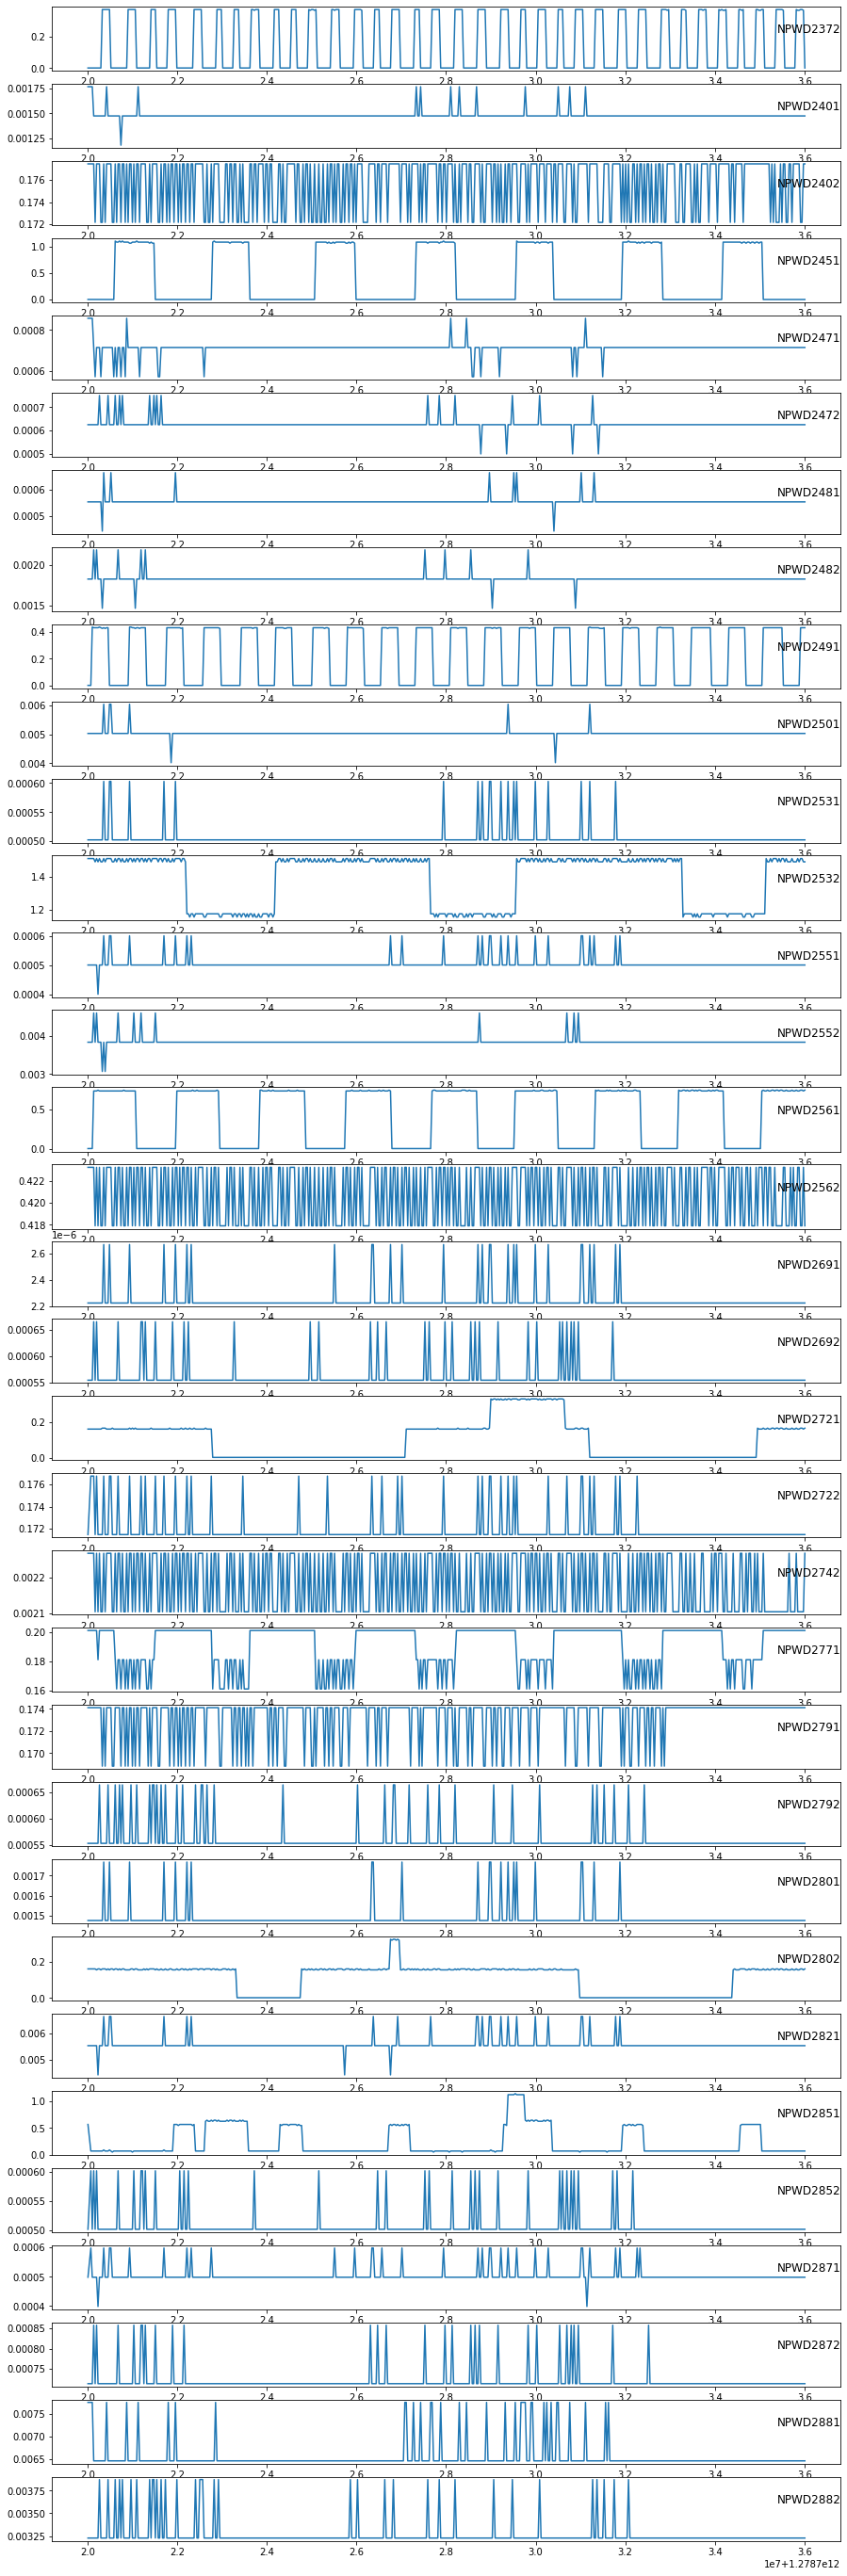

In [ ]:
analyse_brute()

In [33]:
# data['subsystem'].where(len(data['subsystem'].split(".")) == 2)
f = lambda x : x**2
print(f(2))
# create a new column
data['len'] = data.apply(lambda x : len(x['subsystem'].split(".")), axis=1)
data['commande'] = data.apply(lambda x : x['subsystem'][:4], axis=1)



4


In [34]:
data.loc[data['len']==2]["commande"].unique()


array(['MAPO', 'MOCS', 'MPER', 'MOCE', 'SCMN', 'PPNS', 'UPBS', 'UPBE',
       'PPNE', 'PENS', 'PENE', 'PDNS', 'PDNE', 'UDBS', 'UDBE'],
      dtype=object)

In [35]:
data.loc[data['len']!=2]["commande"].unique()


array(['AXXX', 'ATMB', 'ASEQ', 'AAAA', 'ATTT', 'APSF', 'AHHH', 'AMMM',
       'ASSS', 'AOOO', 'ASXX', 'AVVV', 'AACF', 'APWF', 'OBCP', 'ADMC'],
      dtype=object)

In [32]:
data

,subsystem,len,commande,flight_dymanics
ut_ms,,,,
1278723363000,AXXX305B,1,AXXX,AXXX305B
1278723542000,ATMB228K,1,ATMB,ATMB228K
1278723903000,ASEQ4200,1,ASEQ,ASEQ4200
1278727632000,MAPO.0000008345,2,MAPO,MAPO
1278730771000,AXXX301B,1,AXXX,AXXX301B
...,...,...,...,...
1336978518000,PENE.0000005004,2,PENE,PENE
1336978522000,PENE.0000005004,2,PENE,PENE
1336979353000,MPER.0000000658,2,MPER,MPER


In [6]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2010-07-10_2012-05-27--dmop.csv
1 - context--2010-07-10_2012-05-27--evtf.csv
2 - context--2010-07-10_2012-05-27--ftl.csv
3 - context--2010-07-10_2012-05-27--ltdata.csv
4 - context--2010-07-10_2012-05-27--saaf.csv
5 - context--2012-05-27_2014-04-14--dmop.csv
6 - context--2012-05-27_2014-04-14--evtf.csv
7 - context--2012-05-27_2014-04-14--ftl.csv
8 - context--2012-05-27_2014-04-14--ltdata.csv
9 - context--2012-05-27_2014-04-14--saaf.csv
10 - power--2010-07-10_2012-05-27.csv
11 - power--2012-05-27_2014-04-14.csv
0 - context--2010-07-10_2012-05-27--dmop.csv


,subsystem
ut_ms,
1278723363000,AXXX305B
1278723542000,ATMB228K
1278723903000,ASEQ4200
1278727632000,MAPO.0000008345
1278730771000,AXXX301B
...,...
1336978518000,PENE.0000005004
1336978522000,PENE.0000005004
1336979353000,MPER.0000000658


In [ ]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2010-07-10_2012-05-27--saaf.csv
1 - context--2010-07-10_2012-05-27--dmop.csv
2 - context--2012-05-27_2014-04-14--ltdata.csv
3 - context--2012-05-27_2014-04-14--dmop.csv
4 - power--2010-07-10_2012-05-27.csv
5 - context--2010-07-10_2012-05-27--ltdata.csv
6 - context--2010-07-10_2012-05-27--ftl.csv
7 - context--2012-05-27_2014-04-14--evtf.csv
8 - context--2012-05-27_2014-04-14--ftl.csv
9 - context--2012-05-27_2014-04-14--saaf.csv
10 - context--2010-07-10_2012-05-27--evtf.csv
11 - power--2012-05-27_2014-04-14.csv


Selection :  2


2 - context--2012-05-27_2014-04-14--ltdata.csv


,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
1338076800000,2.419149e+08,1.717432e+08,38.486638,522.367711,30.100000,0.000000
1338163200000,2.417759e+08,1.729364e+08,38.572085,522.968268,30.616667,0.000000
1338249600000,2.416359e+08,1.741283e+08,38.652601,523.574665,31.266667,0.000000
1338336000000,2.414947e+08,1.753189e+08,38.728317,524.186895,31.716667,0.000000
1338422400000,2.413525e+08,1.765078e+08,38.799358,524.804950,32.166667,0.000000
...,...,...,...,...,...,...
1397001600000,2.426166e+08,9.285879e+07,1.525746,519.350386,32.816667,33.016667
1397088000000,2.424833e+08,9.270270e+07,1.779344,519.921585,32.650000,32.900000
1397174400000,2.423488e+08,9.257788e+07,2.330063,520.498670,32.516667,32.816667


## Tentative d'interpolation pour caler ltdata sur le sampling rate de saaf

In [ ]:

## import de la première année d'une classe de variables quantitative (saaf, ltdata)
def import_quantitative_df(file_name, folder = FOLDER):
    query = f"*{folder}*{file_name}*"
    file_name_list = glob.glob(query) 
    file_name_first = np.sort(file_name_list)[0]
    print(file_name_first, "imported.")
    data = pd.read_csv(file_name_first, sep=",", index_col=0)
    data['date'] = data.index
    data = data.reset_index(drop=True) 
    # for file_name in file_name_list_sorted:
    #     print(file_name)
    #     data = pd.read_csv(file_name, sep=",", index_col=0)
    #     saaf_data.append(data)
    # saaf = pd.concat(saaf_data)
    return data

def import_power_col(col = "NPWD2451", folder = FOLDER):
    query_power = f"*{FOLDER}*power*"
    file_name_list = glob.glob(query_power) 
    file_name = np.sort(file_name_list)[0] # ordonne selon l'année
    print(file_name, "imported.")
    data = pd.read_csv(file_name, sep=",", index_col=0, usecols = ["ut_ms", col])
    data['date'] = data.index
    data = data.reset_index(drop=True)    
    return data


# Copie des df puis concatenation 
# on trie par date -> ça intercale les mesures ltdata au milieu de celles de saaf
# on interpole tout ce qui manque (NaN) linéairement avec la méthode interpolate de pandas
# et PAF
def concatenate_and_interpolate_df(df_list):
    
    combined = pd.concat(df_list)
    combined = combined.sort_values("date").reset_index(drop=True)
    combined = combined.interpolate()
    combined["interval"] = pd.Series(combined["date"][1:].to_numpy() - combined["date"][:-1].to_numpy())
    combined.dropna()
    return combined

def create_sampling_rate_vec(sec_interval, df):
    """
    Create a date (ut_ms format) vector piecewiese continuous during "sec_interval" seconds
    """
    timestep = sec_interval * 1000
    median_interval = df["interval"].median()
    nb_samples = len(df) 
    group_size = int(timestep // median_interval)
    nb_group = int(nb_samples // group_size)
    print(f"Sample groups : {nb_group}")
    vec = np.zeros(nb_samples)
    for i in range(nb_group):
        vec[group_size * i: group_size * (i + 1)] = [df["date"][i * group_size]] * group_size

    vec[group_size * nb_group :] = [df["date"][ nb_group * group_size]] * len(vec[group_size * nb_group : ])
    return vec

def subsample_df(df, sampling_rate_sec = 3600):
    """
    Subsample all columns of df with a sampling rate in seconds
    """
    group_vector = create_sampling_rate_vec(sampling_rate_sec, df)
    df["groups"] = group_vector
    df.groupby(by="groups").mean()
    df = df.dropna()
    df.set_index('date')
    return df

In [ ]:
saaf = import_quantitative_df("saaf")
ltdata = import_quantitative_df("ltdata")
power = import_power_col()

## categorical

data/train_set/context--2008-08-22_2010-07-10--saaf.csv imported.


/usr/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data/train_set/context--2008-08-22_2010-07-10--ltdata.csv imported.
data/train_set/power--2008-08-22_2010-07-10.csv imported.


In [ ]:
data = concatenate_and_interpolate_df([saaf, ltdata, power])
data = subsample_df(data)

Sample groups : 16804


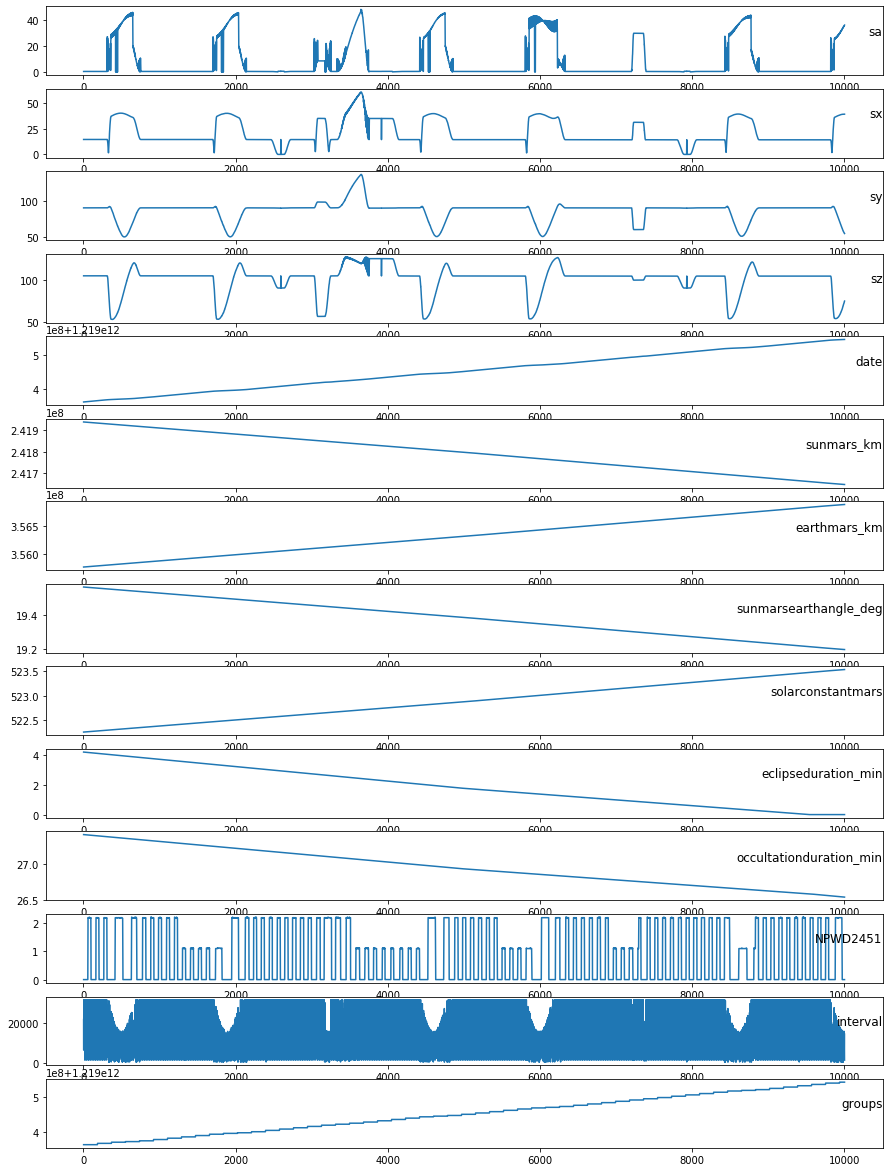

In [ ]:
plot_all_columns_of_df(data, 10000)

In [ ]:
# Selection des colonnes 
# Division X et Y
# train test split
data.drop(["interval", "groups"], inplace = True, axis = 1)
data

,sa,sx,sy,sz,date,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,NPWD2451
2,0.32,14.550000,90.32,104.550000,1219363213000,2.419389e+08,3.557563e+08,19.565005,522.264243,4.165696,27.399810,0.005350
3,0.34,14.560000,90.34,104.550000,1219363235000,2.419388e+08,3.557564e+08,19.564969,522.264365,4.165211,27.399715,0.005684
4,0.34,14.560000,90.34,104.550000,1219363241537,2.419388e+08,3.557565e+08,19.564933,522.264487,4.164725,27.399620,0.006019
5,0.34,14.560000,90.34,104.550000,1219363273542,2.419388e+08,3.557566e+08,19.564898,522.264609,4.164240,27.399525,0.005015
6,0.34,14.560000,90.34,104.550000,1219363295000,2.419387e+08,3.557567e+08,19.564862,522.264732,4.163755,27.399430,0.005015
...,...,...,...,...,...,...,...,...,...,...,...,...
3092092,0.24,28.150000,90.24,118.150000,1278719919000,2.420694e+08,2.765641e+08,33.267254,521.701215,0.000000,12.200000,0.005015
3092093,0.27,28.140000,90.27,118.140000,1278719930000,2.420694e+08,2.765641e+08,33.267254,521.701215,0.000000,12.200000,0.005015
3092094,0.26,28.143333,90.26,118.143333,1278719944561,2.420694e+08,2.765641e+08,33.267254,521.701215,0.000000,12.200000,0.005015
3092095,0.25,28.146667,90.25,118.146667,1278719976556,2.420694e+08,2.765641e+08,33.267254,521.701215,0.000000,12.200000,0.005015


In [ ]:
X = data.copy()
X.drop(["NPWD2451"], inplace = True, axis = 1) # drop
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092095 entries, 2 to 3092096
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sa                       float64
 1   sx                       float64
 2   sy                       float64
 3   sz                       float64
 4   date                     int64  
 5   sunmars_km               float64
 6   earthmars_km             float64
 7   sunmarsearthangle_deg    float64
 8   solarconstantmars        float64
 9   eclipseduration_min      float64
 10  occultationduration_min  float64
dtypes: float64(10), int64(1)
memory usage: 283.1 MB


In [ ]:
y = data.copy()
y.drop(y.loc[:,"sa":"occultationduration_min"], inplace = True, axis = 1)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092095 entries, 2 to 3092096
Data columns (total 1 columns):
 #   Column    Dtype  
---  ------    -----  
 0   NPWD2451  float64
dtypes: float64(1)
memory usage: 47.2 MB


In [ ]:
from sklearn.preprocessing import StandardScaler

def scaling(x_train, x_test):
    scaler = StandardScaler() 
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train_scaled, X_test_scaled = scaling(X_train, X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(20,max_depth=2, random_state=0)
regr.fit(X_train_scaled, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = Random().fit(X_train_scaled, y_train)

NameError: name 'Random' is not defined

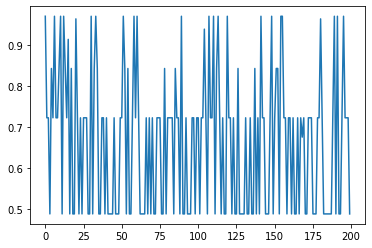

In [ ]:
predict = regr.predict(X_test_scaled)
plt.plot(predict[:200])

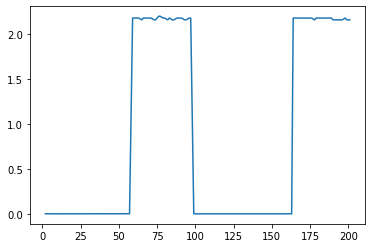

In [ ]:
plt.plot(data["NPWD2451"][:200])


In [ ]:
from metrics import rmse
print(rmse(predict, data["NPWD2451"]))

ValueError: operands could not be broadcast together with shapes (618419,) (3092095,) 

NameError: name 'combined' is not defined

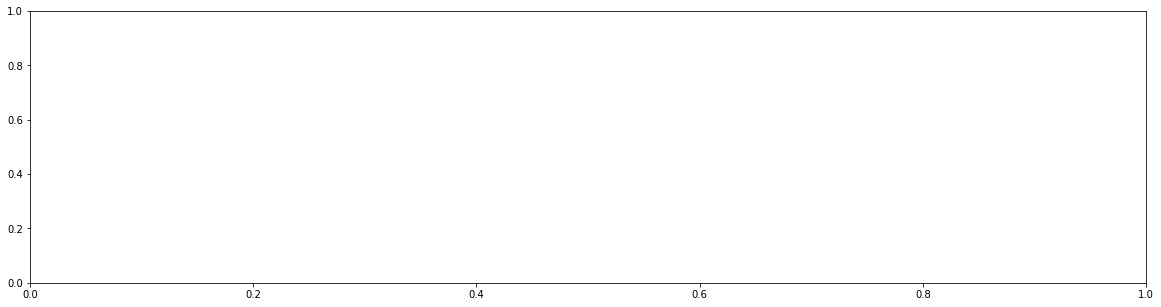

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(combined["date"], combined["eclipseduration_min"])
plt.show()

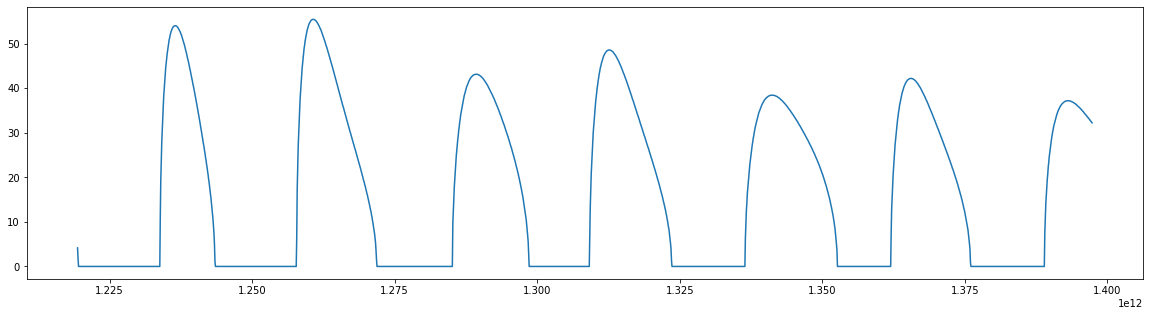

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(ltdata.index, ltdata["eclipseduration_min"])
plt.show()